<a href="https://colab.research.google.com/github/OscarRondoni/Coursera_Capstone/blob/master/Capstone_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de los accidentes en Catalunya entre los años 2010-2018 mediante Machine learning

In [85]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
#import data
data=pd.read_csv('https://analisi.transparenciacatalunya.cat/api/views/rmgc-ncpb/rows.csv?accessType=DOWNLOAD&sorting=true')
data.head(4)

,Any,zona,dat,via,pk,nomMun,nomCom,nomDem,F_MORTS,F_FERITS_GREUS,F_FERITS_LLEUS,F_VICTIMES,F_UNITATS_IMPLICADES,F_VIANANTS_IMPLICADES,F_BICICLETES_IMPLICADES,F_CICLOMOTORS_IMPLICADES,F_MOTOCICLETES_IMPLICADES,F_VEH_LLEUGERS_IMPLICADES,F_VEH_PESANTS_IMPLICADES,F_ALTRES_UNIT_IMPLICADES,F_UNIT_DESC_IMPLICADES,C_VELOCITAT_VIA,D_ACC_AMB_FUGA,D_BOIRA,D_CARACT_ENTORN,D_CARRIL_ESPECIAL,D_CIRCULACIO_MESURES_ESP,D_CLIMATOLOGIA,D_FUNC_ESP_VIA,D_GRAVETAT,D_INFLUIT_BOIRA,D_INFLUIT_CARACT_ENTORN,D_INFLUIT_CIRCULACIO,D_INFLUIT_ESTAT_CLIMA,D_INFLUIT_INTEN_VENT,D_INFLUIT_LLUMINOSITAT,D_INFLUIT_MESU_ESP,D_INFLUIT_OBJ_CALCADA,D_INFLUIT_SOLCS_RASES,D_INFLUIT_VISIBILITAT,D_INTER_SECCIO,D_LIMIT_VELOCITAT,D_LLUMINOSITAT,D_REGULACIO_PRIORITAT,D_SENTITS_VIA,D_SUBTIPUS_ACCIDENT,D_SUBTIPUS_TRAM,D_SUBZONA,D_SUPERFICIE,D_TIPUS_VIA,D_TITULARITAT_VIA,D_TRACAT_ALTIMETRIC,D_VENT,grupDiaLab,hor,grupHor,tipAcc,tipDia
0,2010,Zona urbana,25/01/2010,SE,999999.0,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,0,1,2,0,0,0,0,1,0,1,0,100.0,No,No n'hi ha,Desmunt,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Arribant o eixint intersecció fins 50m,Genérica via,"De nit, il·luminació artificial suficient",Sols norma prioritat de pas,Un sol sentit,Encalç,Intersecció en T o Y,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",Feiners,2333,Nit,Col.lisió de vehicles en marxa,dill-dij
1,2010,Carretera,31/10/2010,N-240,999.0,LLEIDA,Segria,Lleida,0,1,3,4,1,0,0,0,0,1,0,0,0,40.0,No,No n'hi ha,A nivell,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Dintre intersecció,Senyal velocitat,"De nit, il·luminació artificial suficient",Senyal Stop o cedeix pas,Doble sentit,Resta sortides de via,Giratòria,Carretera,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1,Nit,Sortida de la calcada sense especificar,dg
2,2010,Carretera,17/05/2010,N-II,7087.0,FORNELLS DE LA SELVA,Girones,Girona,1,0,2,3,4,0,0,0,0,2,2,0,0,80.0,No,No n'hi ha,A nivell,No n'hi ha,No n'hi ha,Bon temps,Variant,Accident mortal,No,No,No,No,No,No,No,No,No,No,En secció,Senyal velocitat,"De dia, dia clar",NaN,Doble sentit,Col·lisió frontal,NaN,Carretera,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,1527,Tarda,Col.lisió de vehicles en marxa,dill-dij
3,2010,Zona urbana,21/08/2010,SE,999999.0,BARCELONA,Barcelones,Barcelona,0,2,7,9,2,0,0,0,0,2,0,0,0,100.0,No,No n'hi ha,Sense Especificar,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Dintre intersecció,Genérica via,"De nit, il·luminació artificial suficient",Semàfor,Un sol sentit,Envestida (frontal lateral),Encreuament o intersecció en X o +,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,223,Nit,Col.lisió de vehicles en marxa,dis


In [87]:
data.shape

(16774, 58)

In [88]:
data.dtypes

Any                            int64
zona                          object
dat                           object
via                           object
pk                           float64
nomMun                        object
nomCom                        object
nomDem                        object
F_MORTS                        int64
F_FERITS_GREUS                 int64
F_FERITS_LLEUS                 int64
F_VICTIMES                     int64
F_UNITATS_IMPLICADES           int64
F_VIANANTS_IMPLICADES          int64
F_BICICLETES_IMPLICADES        int64
F_CICLOMOTORS_IMPLICADES       int64
F_MOTOCICLETES_IMPLICADES      int64
F_VEH_LLEUGERS_IMPLICADES      int64
F_VEH_PESANTS_IMPLICADES       int64
F_ALTRES_UNIT_IMPLICADES       int64
F_UNIT_DESC_IMPLICADES         int64
C_VELOCITAT_VIA              float64
D_ACC_AMB_FUGA                object
D_BOIRA                       object
D_CARACT_ENTORN               object
D_CARRIL_ESPECIAL             object
D_CIRCULACIO_MESURES_ESP      object
D

In [89]:
data.drop(['F_UNIT_DESC_IMPLICADES'],axis=1,inplace=True)

In [90]:
data.isnull()

,Any,zona,dat,via,pk,nomMun,nomCom,nomDem,F_MORTS,F_FERITS_GREUS,F_FERITS_LLEUS,F_VICTIMES,F_UNITATS_IMPLICADES,F_VIANANTS_IMPLICADES,F_BICICLETES_IMPLICADES,F_CICLOMOTORS_IMPLICADES,F_MOTOCICLETES_IMPLICADES,F_VEH_LLEUGERS_IMPLICADES,F_VEH_PESANTS_IMPLICADES,F_ALTRES_UNIT_IMPLICADES,C_VELOCITAT_VIA,D_ACC_AMB_FUGA,D_BOIRA,D_CARACT_ENTORN,D_CARRIL_ESPECIAL,D_CIRCULACIO_MESURES_ESP,D_CLIMATOLOGIA,D_FUNC_ESP_VIA,D_GRAVETAT,D_INFLUIT_BOIRA,D_INFLUIT_CARACT_ENTORN,D_INFLUIT_CIRCULACIO,D_INFLUIT_ESTAT_CLIMA,D_INFLUIT_INTEN_VENT,D_INFLUIT_LLUMINOSITAT,D_INFLUIT_MESU_ESP,D_INFLUIT_OBJ_CALCADA,D_INFLUIT_SOLCS_RASES,D_INFLUIT_VISIBILITAT,D_INTER_SECCIO,D_LIMIT_VELOCITAT,D_LLUMINOSITAT,D_REGULACIO_PRIORITAT,D_SENTITS_VIA,D_SUBTIPUS_ACCIDENT,D_SUBTIPUS_TRAM,D_SUBZONA,D_SUPERFICIE,D_TIPUS_VIA,D_TITULARITAT_VIA,D_TRACAT_ALTIMETRIC,D_VENT,grupDiaLab,hor,grupHor,tipAcc,tipDia
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16769,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False
16770,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
16771,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False
16772,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [91]:
data.isnull().sum()

Any                              0
zona                             0
dat                              0
via                              0
pk                               1
nomMun                           0
nomCom                           0
nomDem                           0
F_MORTS                          0
F_FERITS_GREUS                   0
F_FERITS_LLEUS                   0
F_VICTIMES                       0
F_UNITATS_IMPLICADES             0
F_VIANANTS_IMPLICADES            0
F_BICICLETES_IMPLICADES          0
F_CICLOMOTORS_IMPLICADES         0
F_MOTOCICLETES_IMPLICADES        0
F_VEH_LLEUGERS_IMPLICADES        0
F_VEH_PESANTS_IMPLICADES         0
F_ALTRES_UNIT_IMPLICADES         0
C_VELOCITAT_VIA               2120
D_ACC_AMB_FUGA                   0
D_BOIRA                          0
D_CARACT_ENTORN                 28
D_CARRIL_ESPECIAL              832
D_CIRCULACIO_MESURES_ESP        36
D_CLIMATOLOGIA                   0
D_FUNC_ESP_VIA                   0
D_GRAVETAT          

In [92]:
data.isna

<bound method DataFrame.isna of         Any  ...    tipDia
0      2010  ...  dill-dij
1      2010  ...        dg
2      2010  ...  dill-dij
3      2010  ...       dis
4      2010  ...       div
...     ...  ...       ...
16769  2018  ...  dill-dij
16770  2018  ...  dill-dij
16771  2018  ...        dg
16772  2018  ...  dill-dij
16773  2018  ...  dill-dij

[16774 rows x 57 columns]>

In [93]:
data.describe()

,Any,pk,F_MORTS,F_FERITS_GREUS,F_FERITS_LLEUS,F_VICTIMES,F_UNITATS_IMPLICADES,F_VIANANTS_IMPLICADES,F_BICICLETES_IMPLICADES,F_CICLOMOTORS_IMPLICADES,F_MOTOCICLETES_IMPLICADES,F_VEH_LLEUGERS_IMPLICADES,F_VEH_PESANTS_IMPLICADES,F_ALTRES_UNIT_IMPLICADES,C_VELOCITAT_VIA,hor
count,16774.000000,16773.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,14654.000000,16774.000000
mean,2013.897580,523111.778811,0.139919,1.003219,0.407535,1.550674,1.893943,0.251401,0.082926,0.086622,0.392512,0.934482,0.127876,0.018123,136.754402,949.659533
std,2.567239,498936.376803,0.406867,0.540928,0.988399,1.225059,0.770062,0.501167,0.317953,0.287992,0.536160,0.806985,0.379740,0.138230,209.862794,740.394816
min,2010.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,155.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,162.000000
50%,2014.000000,999999.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,100.000000,1009.000000
75%,2016.000000,999999.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1618.000000
max,2018.000000,999999.000000,13.000000,23.000000,22.000000,49.000000,21.000000,6.000000,8.000000,5.000000,7.000000,17.000000,6.000000,4.000000,999.000000,2359.000000


I observed that the frequency of involvement of bicycles (0.082926) is similar to the frequency of mopeds (0.086622). The frequency of pedestrians 0.251401 The frequency of motorcycles 0.392512

In [94]:
#Select numeric variables and correlation is made
data.select_dtypes(include=[np.number]).dtypes
get_numeric=data.select_dtypes(include=[np.number])
get_numeric.corr()


,Any,pk,F_MORTS,F_FERITS_GREUS,F_FERITS_LLEUS,F_VICTIMES,F_UNITATS_IMPLICADES,F_VIANANTS_IMPLICADES,F_BICICLETES_IMPLICADES,F_CICLOMOTORS_IMPLICADES,F_MOTOCICLETES_IMPLICADES,F_VEH_LLEUGERS_IMPLICADES,F_VEH_PESANTS_IMPLICADES,F_ALTRES_UNIT_IMPLICADES,C_VELOCITAT_VIA,hor
Any,1.000000,-0.035901,-0.014419,-0.004657,-0.016914,-0.020491,-0.008661,-0.016223,0.027935,-0.066542,0.058185,-0.014952,-0.020261,0.002207,0.140510,0.095108
pk,-0.035901,1.000000,-0.166443,-0.051062,-0.164298,-0.210385,0.086260,0.329981,0.009933,0.130380,0.032200,-0.131547,-0.130277,-0.009387,-0.126390,-0.136181
F_MORTS,-0.014419,-0.166443,1.000000,-0.315199,0.073758,0.252452,0.047175,-0.034805,-0.033932,-0.070370,-0.072487,0.075133,0.165879,0.000493,-0.068932,0.029435
F_FERITS_GREUS,-0.004657,-0.051062,-0.315199,1.000000,0.135708,0.446360,0.099005,-0.036854,-0.019925,0.010839,-0.048349,0.188553,-0.070212,-0.011943,0.016186,0.002396
F_FERITS_LLEUS,-0.016914,-0.164298,0.073758,0.135708,1.000000,0.891236,0.265071,-0.058082,-0.053097,-0.047576,-0.097901,0.359971,0.069389,-0.003880,-0.024911,0.027269
F_VICTIMES,-0.020491,-0.210385,0.252452,0.446360,0.891236,1.000000,0.273248,-0.074694,-0.062907,-0.056970,-0.124411,0.398640,0.080074,-0.008240,-0.035824,0.032835
F_UNITATS_IMPLICADES,-0.008661,0.086260,0.047175,0.099005,0.265071,0.273248,1.000000,0.276099,0.048585,0.012125,0.020112,0.650705,0.201535,0.002376,-0.112411,0.004424
F_VIANANTS_IMPLICADES,-0.016223,0.329981,-0.034805,-0.036854,-0.058082,-0.074694,0.276099,1.000000,-0.096792,-0.116605,-0.259424,-0.073517,-0.057095,-0.029627,-0.077724,-0.032747
F_BICICLETES_IMPLICADES,0.027935,0.009933,-0.033932,-0.019925,-0.053097,-0.062907,0.048585,-0.096792,1.000000,-0.075196,-0.163668,-0.124281,-0.053762,-0.013849,0.067728,-0.017921
F_CICLOMOTORS_IMPLICADES,-0.066542,0.130380,-0.070370,0.010839,-0.047576,-0.056970,0.012125,-0.116605,-0.075196,1.000000,-0.164994,-0.098458,-0.064222,-0.028954,-0.040514,-0.000332


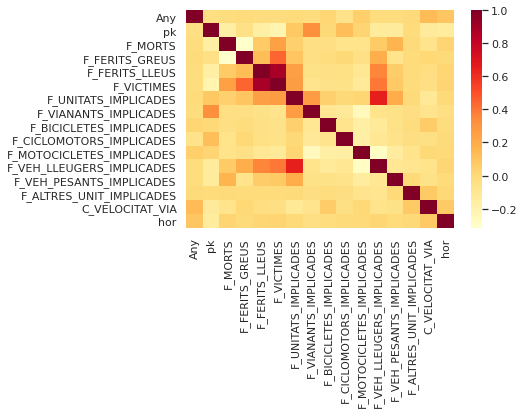

In [95]:
#heatmap
sns.heatmap(get_numeric.corr(),cmap="YlOrRd")

It can be seen that the numerical variables that are highly correlated are Ferirs lleus amb victims. Which is obvious since they are dependent. It will be difficult to explain the variables

In [96]:
get_numeric.corr()['F_MORTS']

Any                         -0.014419
pk                          -0.166443
F_MORTS                      1.000000
F_FERITS_GREUS              -0.315199
F_FERITS_LLEUS               0.073758
F_VICTIMES                   0.252452
F_UNITATS_IMPLICADES         0.047175
F_VIANANTS_IMPLICADES       -0.034805
F_BICICLETES_IMPLICADES     -0.033932
F_CICLOMOTORS_IMPLICADES    -0.070370
F_MOTOCICLETES_IMPLICADES   -0.072487
F_VEH_LLEUGERS_IMPLICADES    0.075133
F_VEH_PESANTS_IMPLICADES     0.165879
F_ALTRES_UNIT_IMPLICADES     0.000493
C_VELOCITAT_VIA             -0.068932
hor                          0.029435
Name: F_MORTS, dtype: float64

In [97]:
mort_correlation=get_numeric.corr()['F_MORTS']
type(mort_correlation)
mort_correlation.sort_values(ascending=False)

F_MORTS                      1.000000
F_VICTIMES                   0.252452
F_VEH_PESANTS_IMPLICADES     0.165879
F_VEH_LLEUGERS_IMPLICADES    0.075133
F_FERITS_LLEUS               0.073758
F_UNITATS_IMPLICADES         0.047175
hor                          0.029435
F_ALTRES_UNIT_IMPLICADES     0.000493
Any                         -0.014419
F_BICICLETES_IMPLICADES     -0.033932
F_VIANANTS_IMPLICADES       -0.034805
C_VELOCITAT_VIA             -0.068932
F_CICLOMOTORS_IMPLICADES    -0.070370
F_MOTOCICLETES_IMPLICADES   -0.072487
pk                          -0.166443
F_FERITS_GREUS              -0.315199
Name: F_MORTS, dtype: float64

The possible numerical explanatory variable to the target 'MORTS' could be the one with the highest correlation: 'F_VICTIMES'. It seems logical.

# Represent the dead and injured as a function of time

In [98]:
x=data['Any'].unique()
x.shape

(9,)

In [99]:
y1=data.groupby(['Any'])['F_MORTS'].sum()
y2=data.groupby(['Any'])['F_VICTIMES'].sum()
y3=data.groupby(['Any'])['F_FERITS_GREUS'].sum()
y4=data.groupby(['Any'])['F_FERITS_LLEUS'].sum()

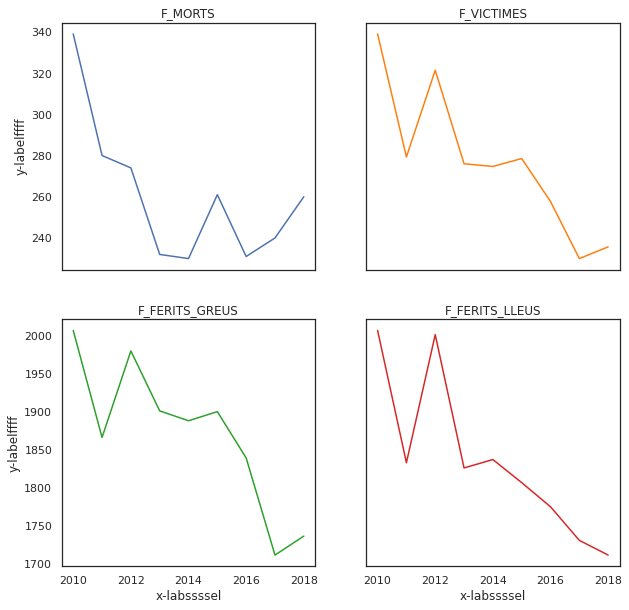

In [100]:
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html


fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('F_MORTS')
axs[0, 1].plot(x, y2, 'tab:orange')
axs[0, 1].set_title('F_VICTIMES')
axs[1, 0].plot(x, y3, 'tab:green')
axs[1, 0].set_title('F_FERITS_GREUS')
axs[1, 1].plot(x, y4, 'tab:red')
axs[1, 1].set_title('F_FERITS_LLEUS')

for ax in axs.flat:
    ax.set(xlabel='x-labssssel', ylabel='y-labelffff')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

It is observed that both deaths, victims and minor and serious accidents decrease over time

## Linear regression

(0.0, 13.65)

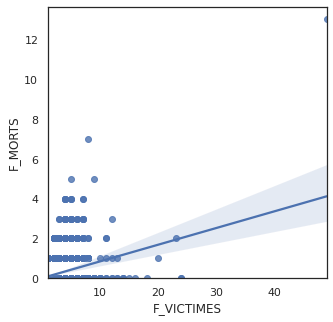

In [101]:
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x='F_VICTIMES', y='F_MORTS', data=data)
plt.ylim(0,)

In [102]:
#Grouped by F_VICTIMES
data.groupby(['F_VICTIMES'])['dat'].count().head()

F_VICTIMES
1    11689
2     3098
3      994
4      485
5      258
Name: dat, dtype: int64

In [103]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = data[['F_VICTIMES']]
Y = data['F_MORTS']
lm.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
lm.coef_

array([0.08384447])

In [105]:
lm.intercept_

0.009903505711555877

In [106]:
print('MORTS =',lm.coef_[0],' * VICTIMES +',lm.intercept_)

MORTS = 0.08384447330723009  * VICTIMES + 0.009903505711555877


In [107]:
lm.score(X, Y)

0.06373222047399818

Conclusion: The number of victims does not explain the number of deaths

## Residual plot

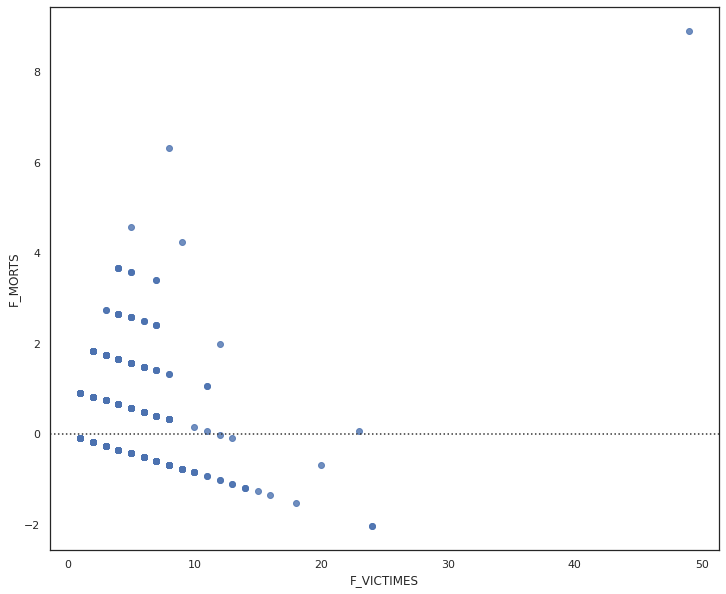

In [108]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data['F_VICTIMES'], data['F_MORTS'])
plt.show()

El patrón de residuos es discreto. Creo que seria buena idea agrupar para que los patrones sean mas continuos.


# Determinacion de Puntos Negros Catalunya

In [109]:
 data.groupby(['via','pk'])['dat'].count()

via      pk   
A-2      444.0    1
         447.0    2
         448.0    1
         459.0    1
         461.0    1
                 ..
TV-7333  14.0     1
TV-7421  7.0      1
VM-4406  13.0     1
gi-682   51.0     1
         71.0     1
Name: dat, Length: 6681, dtype: int64

In [110]:
#sorted(data.groupby(['via','pk'])['dat'].count())

In [111]:
df_pn=data.groupby(['via','pk'])['dat'].count().to_frame()
df_pn.iloc[1][0]
df_pn.iloc[1,0]
df_pn.iloc[:,0]>1
df_pn[df_pn.iloc[:,0]>10]

dat
via pk            
CR  0.0         41
    1.0         57
    2.0         18
    4.0         13
    9.0         26
    22.0        11
SE  999999.0  8765

In [112]:
#No consideramos la ultima fila que representa el km 999999. Es absurdo
type(df_pn[df_pn.iloc[:,0]>10]) #pandas.core.frame.DataFrame
df_pn[df_pn.iloc[:,0]>10].iloc[0:6]
#df_pn[df_pn.iloc[:,0]>10].shape

dat
via pk       
CR  0.0    41
    1.0    57
    2.0    18
    4.0    13
    9.0    26
    22.0   11

Conclusion: Se han encontrado 5 puntos negros donde se han producido mas de 10 accidentes-

# Vamos a analizar si las variables categoricas son capaces de explicar el numero de victimas 'F-VICTIMES' realizado un ANOVA

In [113]:
#Normalizamos 'F_VICTIMES' dividiendo por el max
data['F_VICTIMES'] = data['F_VICTIMES']/data['F_VICTIMES'].max()

[(0.0, 0.6)]

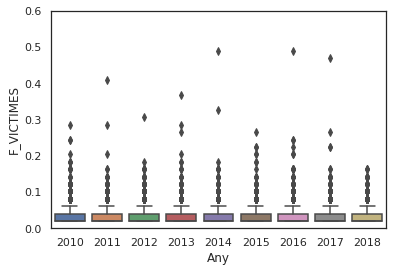

In [114]:
ax=sns.boxplot(x='Any', y='F_VICTIMES', data=data)
ax.set(ylim=(0, 0.6))

[(0.0, 0.5)]

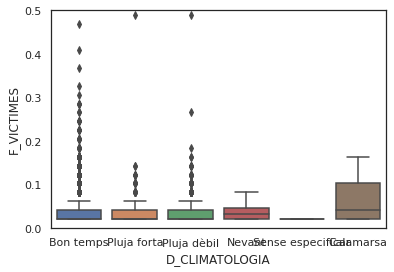

In [115]:
ax=sns.boxplot(x='D_CLIMATOLOGIA', y='F_VICTIMES', data=data)
ax.set(ylim=(0, 0.5))

[(0.0, 0.1)]

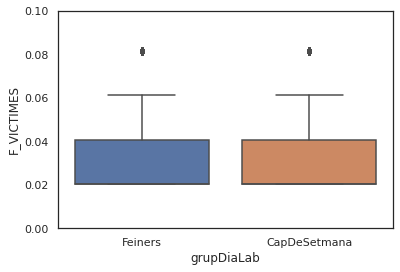

In [116]:
ax=sns.boxplot(x='grupDiaLab', y='F_VICTIMES', data=data)
#sns.plt.ylim(0, 20)

# Set the `ylim`
ax.set(ylim=(0, .1))

# Show the plot
#plt.show()

[(0.0, 5.0)]

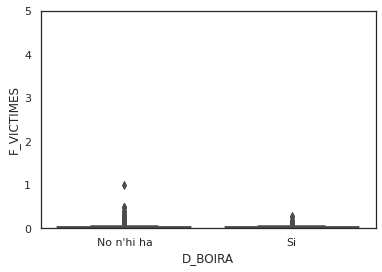

In [117]:
ax=sns.boxplot(x='D_BOIRA', y='F_VICTIMES', data=data)
ax.set(ylim=(0, 5))

[(0.0, 5.0)]

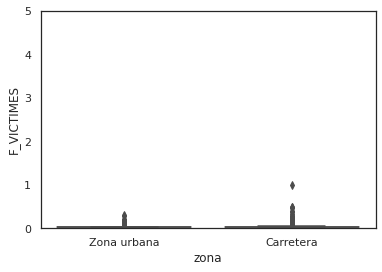

In [118]:
ax=sns.boxplot(x='zona', y='F_VICTIMES', data=data)
ax.set(ylim=(0, 5))

[(0.0, 0.6)]

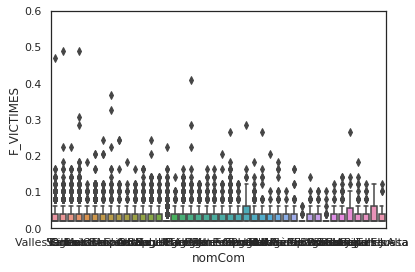

In [119]:
#https://www.datacamp.com/community/tutorials/seaborn-python-tutorial#scale
ax=sns.boxplot(x='nomCom', y='F_VICTIMES',data=data)
ax.set(ylim=(0, 0.6))


[(0.0, 0.045)]

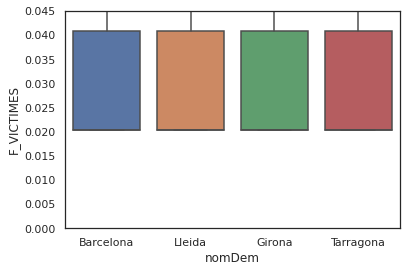

In [120]:
ax=sns.boxplot(x='nomDem', y='F_VICTIMES', data=data)
ax.set(ylim=(0, .045))

[(0.0, 0.6)]

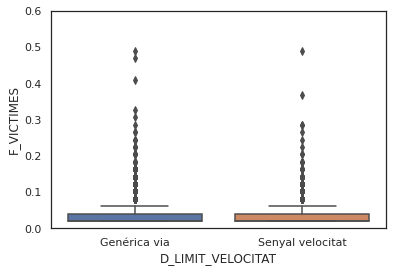

In [121]:
ax=sns.boxplot(x='D_LIMIT_VELOCITAT', y='F_VICTIMES', data=data)
ax.set(ylim=(0, .6))

[(0.0, 0.6)]

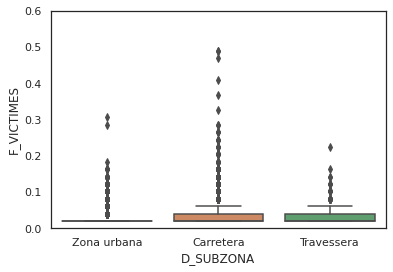

In [122]:
ax=sns.boxplot(x='D_SUBZONA', y='F_VICTIMES', data=data)
ax.set(ylim=(0, 0.6))

[(0.0, 0.1)]

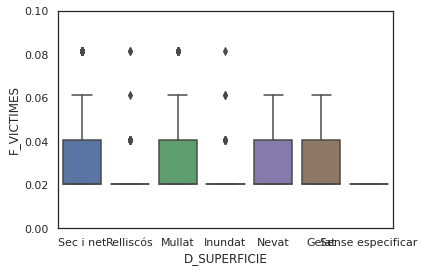

In [123]:
ax=sns.boxplot(x='D_SUPERFICIE', y='F_VICTIMES', data=data)
ax.set(ylim=(0, .1))

[(0.0, 0.6)]

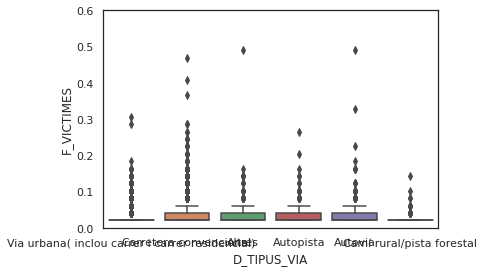

In [124]:
ax=sns.boxplot(x='D_TIPUS_VIA', y='F_VICTIMES', data=data)
ax.set(ylim=(0, .6))

[(0.0, 1.0)]

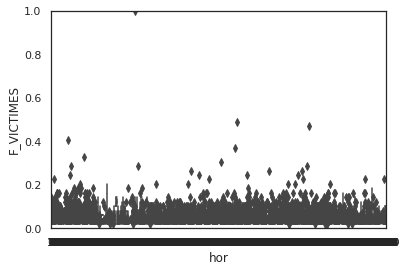

In [125]:
ax=sns.boxplot(x='hor', y='F_VICTIMES', data=data)
ax.set(ylim=(0, 1))

[(0.0, 1.0)]

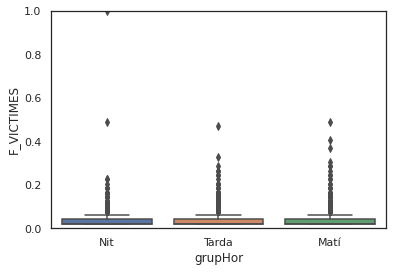

In [126]:
ax=sns.boxplot(x='grupHor', y='F_VICTIMES', data=data)
ax.set(ylim=(0, 1))

[(0.0, 1.0)]

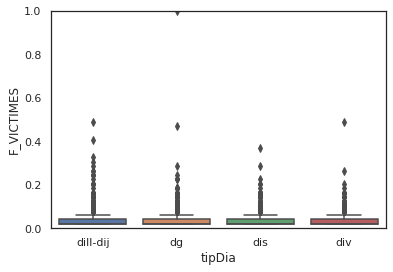

In [127]:
ax=sns.boxplot(x='tipDia', y='F_VICTIMES', data=data)
ax.set(ylim=(0, 1))

In [128]:
data.groupby(['F_VICTIMES'])['dat'].count()

F_VICTIMES
0.020408    11689
0.040816     3098
0.061224      994
0.081633      485
0.102041      258
0.122449      122
0.142857       54
0.163265       35
0.183673        9
0.204082        7
0.224490        5
0.244898        4
0.265306        3
0.285714        3
0.306122        1
0.326531        1
0.367347        1
0.408163        1
0.469388        1
0.489796        2
1.000000        1
Name: dat, dtype: int64

# Graph showing 4 variables "De CLIMATOLOGIA", Bon temps Calamarsa Nevant Pluja weak Pluja forta Sense specify "F_VICTIMES"

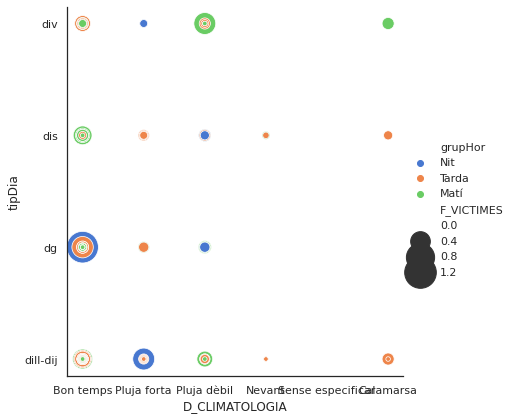

In [129]:
sns.set(style="white")

sns.relplot(x="D_CLIMATOLOGIA", y="tipDia", hue="grupHor", size="F_VICTIMES",
            sizes=(0, 1000), alpha=1, palette="muted",
            height=6, data=data)


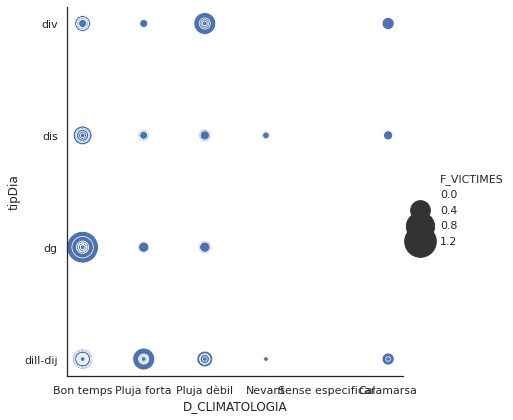

In [130]:
sns.set(style="white")

sns.relplot(x="D_CLIMATOLOGIA", y="tipDia",  size="F_VICTIMES",
            sizes=(0, 1000), alpha=1, palette="muted",
            height=6, data=data)

# Next, dummy variables will be created for some categorical variables

In [131]:
dummy_clima = pd.get_dummies(data["D_CLIMATOLOGIA"])
dummy_clima

,Bon temps,Calamarsa,Nevant,Pluja dèbil,Pluja forta,Sense especificar
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
16769,1,0,0,0,0,0
16770,1,0,0,0,0,0
16771,1,0,0,0,0,0
16772,1,0,0,0,0,0


In [132]:
dummy_clima.drop(['Bon temps','Sense especificar'],axis=1,inplace=True)
dummy_clima

,Calamarsa,Nevant,Pluja dèbil,Pluja forta
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
16769,0,0,0,0
16770,0,0,0,0
16771,0,0,0,0
16772,0,0,0,0


In [133]:
dummy_hora = pd.get_dummies(data["grupHor"])
dummy_hora

,Matí,Nit,Tarda
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
16769,1,0,0
16770,0,1,0
16771,0,0,1
16772,1,0,0


In [134]:
dummy_hora.drop(['Matí'],axis=1,inplace=True)	

In [135]:
dummy_dia = pd.get_dummies(data['tipDia'])
dummy_dia

,dg,dill-dij,dis,div
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
16769,0,1,0,0
16770,0,1,0,0
16771,1,0,0,0
16772,0,1,0,0


In [136]:
dummy_dia.drop(['dill-dij'],axis=1,inplace=True)


In [137]:
data=pd.read_csv('https://analisi.transparenciacatalunya.cat/api/views/rmgc-ncpb/rows.csv?accessType=DOWNLOAD&sorting=true')
y=data['F_VICTIMES']

In [139]:
Z= pd.concat([dummy_clima,dummy_dia,dummy_hora], axis=1)

# drop original column "fuel-type" from "df"
Z

,Calamarsa,Nevant,Pluja dèbil,Pluja forta,dg,dis,div,Nit,Tarda
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
16769,0,0,0,0,0,0,0,0,0
16770,0,0,0,0,0,0,0,1,0
16771,0,0,0,0,1,0,0,0,1
16772,0,0,0,0,0,0,0,0,0


In [140]:
lm.fit(Z, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
lm.score(Z, y)

0.02149025732509935

In [142]:
lm.intercept_

1.379673714816478

In [143]:
lm.coef_

array([2.05803956, 0.38042372, 0.25383474, 0.38031421, 0.37995285,
       0.23994064, 0.03406838, 0.21569835, 0.07322321])

In [146]:
y_hat = lm.predict(Z)
y_hat

array([1.59537207, 1.97532491, 1.45289692, ..., 1.83284977, 1.37967371,
       1.37967371])

Text(0.5, 1.0, 'Actual vs Fitted Values for VICTIMES')

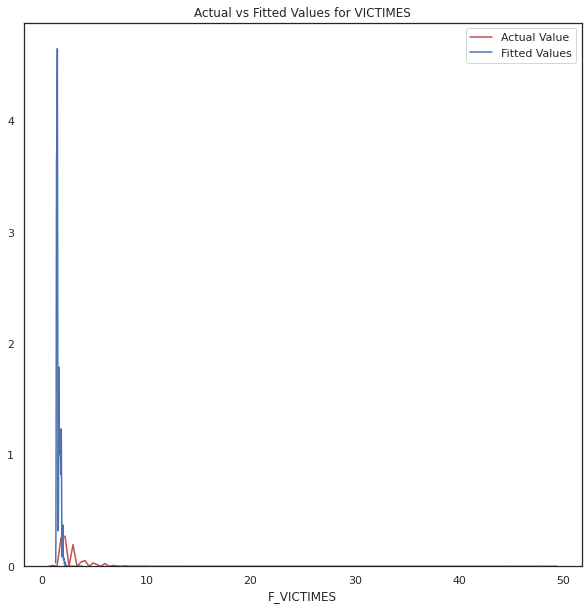

In [147]:
width=10
height=10

plt.figure(figsize=(width, height))


ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for VICTIMES')

In [152]:
yZ= pd.concat([y,Z], axis=1)
yZ

,F_VICTIMES,Calamarsa,Nevant,Pluja dèbil,Pluja forta,dg,dis,div,Nit,Tarda
0,1,0,0,0,0,0,0,0,1,0
1,4,0,0,0,0,1,0,0,1,0
2,3,0,0,0,0,0,0,0,0,1
3,9,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
16769,2,0,0,0,0,0,0,0,0,0
16770,1,0,0,0,0,0,0,0,1,0
16771,1,0,0,0,0,1,0,0,0,1
16772,1,0,0,0,0,0,0,0,0,0


In [149]:
yZ.corr()

,F_VICTIMES,Calamarsa,Nevant,Pluja dèbil,Pluja forta,dg,dis,div,Nit,Tarda
F_VICTIMES,1.000000,0.037920,0.005783,0.042540,0.035777,0.094468,0.052799,-0.021583,0.057929,0.000815
Calamarsa,0.037920,1.000000,-0.000506,-0.004999,-0.002689,-0.009266,0.004845,0.004002,-0.008532,0.014365
Nevant,0.005783,-0.000506,1.000000,-0.004713,-0.002536,-0.008736,0.006277,-0.009500,-0.008044,0.012327
Pluja dèbil,0.042540,-0.004999,-0.004713,1.000000,-0.025042,0.000111,0.000502,-0.009216,0.018657,-0.002567
Pluja forta,0.035777,-0.002689,-0.002536,-0.025042,1.000000,0.003397,0.007335,-0.013477,-0.001009,0.024561
dg,0.094468,-0.009266,-0.008736,0.000111,0.003397,1.000000,-0.166664,-0.173932,0.054283,-0.064248
dis,0.052799,0.004845,0.006277,0.000502,0.007335,-0.166664,1.000000,-0.181236,0.071775,-0.056722
div,-0.021583,0.004002,-0.009500,-0.009216,-0.013477,-0.173932,-0.181236,1.000000,-0.002809,0.013164
Nit,0.057929,-0.008532,-0.008044,0.018657,-0.001009,0.054283,0.071775,-0.002809,1.000000,-0.345664
Tarda,0.000815,0.014365,0.012327,-0.002567,0.024561,-0.064248,-0.056722,0.013164,-0.345664,1.000000


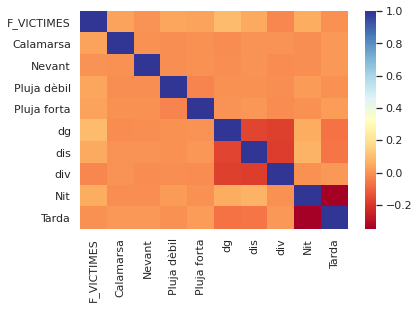

In [150]:
ax = sns.heatmap(yZ.corr(),cmap='RdYlBu')


#Conclusion: None of the variables, neither categorical nor numerical, has a sufficiently large correlation for an adjustment to be made that can explain the variable "F_VICTIMAS". I believe that accidents in Catalonia with the data I have at my disposal occur in a random manner.

#I point out different problems:
#1) "F_VICTIMAS" is a discrete variable and has few possible different values.
#2) "F_VICTIMAS" cannot be considered a normal distribution.
#3) Insufficient data